In [20]:
# -*- coding:Utf_8 -*-
#Autor : AREZKI Rafik
from skimage.segmentation import mark_boundaries
from skimage.segmentation import slic
import scipy.misc as im
from sklearn import svm
import seaborn as sns
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
import os,sys
from skimage.io import imsave,imread
from sklearn.externals import joblib

#load model
import model_SVM
import train_SVM
import pred
import measure_Functions

In [2]:
#Path of data training
mainPath=os.getcwd()
print(mainPath)

/Users/rafikarezki/Desktop/SVM


In [3]:
#Construction of learning vectors X, Y
X,Y,class_colors=train_SVM.Construct_X_Y(mainPath,n_segments=2000, compactness=10)

In [4]:
#Training model SVM
model_svm=model_SVM.Train(X,Y)

In [21]:
#Prédiction image
#This module is for predicting test or validation data. 
#This can be applied for any image with the same characteristic (multispectral and thermal
#and with the same statistics). You just have to change the path of the images to predict.
pred.Pred_Data(mainPath, model_svm,n_segments=4000, compactness=100, class_colors=class_colors)

In [8]:
#The overall accuracy of the model on the test and validation images
#precision_SVM.mesure_global(mainPath)

Path=mainPath+'/data/Test_data/'
glob_measure=0
nb_subset=0
for subset in os.listdir(Path):
    for mask in os.listdir(Path+subset+'/ImageAndMaskTif/'):
        if mask.find('pred')>1:
            image_pred=imread(Path+subset+'/ImageAndMaskTif/'+mask)
            print(subset)
            print(np.shape(image_pred))
            print(np.unique(image_pred))
        else:
            if mask.find('mask')>1:
                Ground_truth=imread(Path+subset+'/ImageAndMaskTif/'+mask)
                print(np.shape(Ground_truth))
                print(np.unique(Ground_truth))
                
    measure=measure_Functions.measure_accuracy(image_pred,Ground_truth)
    print("the prediction's measure of "+str(subset)+" is :", measure )
    glob_measure+=measure
    nb_subset+=1
print('The global measure is',glob_measure/nb_subset)


image_5
(291, 274)
[  0 255]
(291, 274, 1)
[  0 255]
the prediction's measure of image_5 is : 94.4427722176236
image_2
(295, 278)
[  0 255]
(295, 278, 1)
[  0 255]
the prediction's measure of image_2 is : 93.93854407999025
(289, 274, 1)
[  0 255]
image_3
(289, 274)
[  0 255]
the prediction's measure of image_3 is : 86.19326648650014
(290, 274, 1)
[  0 255]
image_4
(290, 274)
[  0 255]
the prediction's measure of image_4 is : 94.70551220739995
(300, 313, 1)
[  0 255]
image_1
(300, 313)
[  0 255]
the prediction's measure of image_1 is : 90.34824281150159
(333, 277, 1)
[  0 255]
image_6
(333, 277)
[  0 255]
the prediction's measure of image_6 is : 91.36717945382205
(271, 262, 1)
[  0 255]
image_7
(271, 262)
[  0 255]
the prediction's measure of image_7 is : 73.44300160558858
The global measure is 89.2055026946323


In [41]:
#Image prediction
#random choice of an image
path='/Users/rafikarezki/Desktop/SVM/data/Test_data/'
image_to_pred=random.choice(os.listdir(path))
print(image_to_pred)


image_5


In [42]:
#Prediction
path_image=path+image_to_pred+'/ImageAndMaskArray'
for image_ in os.listdir(path_image):
	if image_.find('image')>1:
		image=np.load(path_image+'/'+image_)


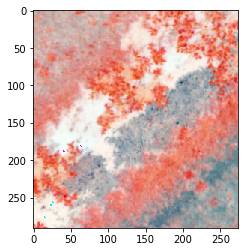

/Users/rafikarezki/Desktop/SVM/data/Test_data/image_5/ImageAndMaskTif/subset_1_10_all_B3.tif
<PIL.TiffImagePlugin.TiffImageFile image mode=L size=274x291 at 0x132A3BE10>


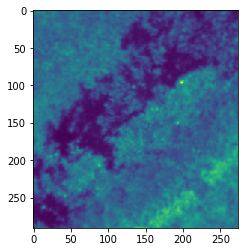

In [43]:
#Image to pred
from PIL import Image
image=measure_Functions.Normalization(image)
imgpil = Image.fromarray((image[:,:,3:6]*255).astype('uint8'))
plt.imshow(imgpil)
plt.show()


path_tif='/Users/rafikarezki/Desktop/SVM/data/Test_data/'+image_to_pred+'/ImageAndMaskTif'

import imageio
import matplotlib.pyplot as plt
for image_tif in os.listdir(path_tif):
    if image_tif.find('B3')>1:
        print(path_tif+'/'+image_tif)
        mask = Image.open(path_tif+'/'+image_tif)
        #image_tif=imread(path_tif+'/'+image_tif)
print(mask)
plt.imshow(mask)
plt.show(mask)

In [44]:
# The normalization of image
image=measure_Functions.Normalization(image) 

#number of segmentations: n_segments
# use the SLIC algorithm
superpixel_labels = slic(image, n_segments=2000, compactness=10)

# the channels of image
B1 = image[:, :, 0]
B2 = image[:, :, 1]
B3 = image[:, :, 2]
B4 = image[:, :, 3]
B5 = image[:, :, 4]
B6 = image[:, :, 5]
B7 = image[:, :, 6]
#The number of superpixels
nb_superpixels = np.max(superpixel_labels) + 1
#Means colors
for label in range(nb_superpixels):
    idx = superpixel_labels == label
    B1[idx] = np.mean(B1[idx])
    B2[idx] = np.mean(B2[idx])
    B3[idx] = np.mean(B3[idx])
    B4[idx] = np.mean(B4[idx])
    B5[idx] = np.mean(B5[idx])
    B6[idx] = np.mean(B6[idx])
    B7[idx] = np.mean(B7[idx])
# Borduries of each supepixel
image_with_boundaries = mark_boundaries(image, superpixel_labels, \
                      color=(1, 1, 1, 1, 1, 1, 1), outline_color=(0, 0, 0, 0, 0, 0, 0))
                # The parameters of image
width = np.shape(B1)[1]
height = np.shape(B1)[0]

# to calculate the position of the barycenter in the width of the image
x_idx = np.repeat(range(width), height)
x_idx = np.reshape(x_idx, [width, height])
x_idx = np.transpose(x_idx)

# THE PARYCENTER OF EACH SUPER-PIXELS ON WEITH
y_idx = np.repeat(range(height), width)
y_idx = np.reshape(y_idx, [height, width])

    ######################################################################
    ##########################.  TRAINING. ##############################@
# extracting the characteristics of each channel
feature_superpixels = []
for label in range(nb_superpixels): 
    # THE PIXELS OF SUPER-PEXELS
    idx = superpixel_labels == label

    # the barycenter of each channel
    c1_mean = np.mean(B1[idx]-np.min(B1)) / (np.max(B1)-np.min(B1))
    c2_mean = np.mean(B2[idx]-np.min(B2)) / (np.max(B2)-np.min(B2))
    c3_mean = np.mean(B3[idx]-np.min(B3)) / (np.max(B3)-np.min(B3))
    c4_mean = np.mean(B4[idx]--np.min(B4)) / (np.max(B4)-np.min(B4))
    c5_mean = np.mean(B5[idx]--np.min(B5)) / (np.max(B5)-np.min(B5))
    c6_mean = np.mean(B6[idx]--np.min(B6)) / (np.max(B6)-np.min(B6)) 
    c7_mean = np.mean(B7[idx]--np.min(B7)) / (np.max(B7)-np.min(B7))
    # calcul et normalisation de la position du barycentre
    x_mean = np.mean(x_idx[idx]) / (width - 1)
    y_mean = np.mean(y_idx[idx]) / (height - 1) 

    # The barycenter vector
    sp = [c1_mean, c2_mean, c3_mean,c4_mean,c5_mean,c6_mean,c7_mean, x_mean, y_mean]
    feature_superpixels.append(sp)

# predict the probability of each superpixel
# to belong to each class
# We have two classes  
probas = model_svm.predict_proba(feature_superpixels)
# predire la classe la plus probable pour chaque superpixel
classification = model_svm.predict(feature_superpixels)
# parcourir chacune des classes
for class_id in range(len(class_colors)):
    pixel_probas = np.zeros([height, width])
    # transfer the probability of the superpixel
    # to the pixels that constitute it
    for label in range(nb_superpixels):
        idx = superpixel_labels == label
        pixel_probas[idx] = probas[label, class_id]
    # show result
    for i in range(0,np.shape(image)[0]): 
        for j in range(0,np.shape(image)[1]):
            if pixel_probas[i,j] > 0.5: 
                pixel_probas[i,j]=1 
            else: 
                pixel_probas[i,j]=0

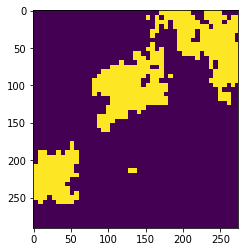

In [45]:
#Display predicted image
mask_pred=pixel_probas
plt.imshow(mask_pred)
plt.show()

In [46]:
#We have two classes, the pixels in yellow are for the class "leaves", 
#and the other colors are for the class "other".

In [47]:
#The calculation of the accuracy
for mask in os.listdir(path_image):
	if mask.find('mask')>1:
		mask_ground_truth=np.load(path_image+'/'+mask)


In [48]:
#Accuracy
acc=measure_Functions.measure_accuracy(mask_pred,mask_ground_truth)

In [49]:
print('The prediction accuracy on this image is:',acc)

The prediction accuracy on this image is: 76.42034765595605


In [ ]:
#thank you